# PROJECT 1- MovieLens Data Analysis 
## Aaron Coteff 09.18.2020
### GreatLearning AI/ML

In [1]:
#import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:,.2f}'.format    
sns.set_style(style='darkgrid')

In [3]:
df_data = pd.read_csv('Data.csv') # RATINGS GIVEN BY USERS TO A PARTICULAR MOVIE. INCLUDES TIMESTAMPS
df_item = pd.read_csv('item.csv') # DATA RELATED TO THE MOVIES AND THEIR GENRES
df_user = pd.read_csv('user.csv') # DATA RELATED TO THE USERS

## Movie Ratings Dataframe

In [4]:
df_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df_data.shape

(100000, 4)

In [6]:
df_data.isnull().any()

user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,"100,000.00",462.48,266.61,1.00,254.00,447.00,682.00,943.00
movie id,"100,000.00",425.53,330.80,1.00,175.00,322.00,631.00,"1,682.00"
rating,"100,000.00",3.53,1.13,1.00,3.00,4.00,4.00,5.00
timestamp,"100,000.00","883,528,851.49","5,343,856.19","874,724,710.00","879,448,709.50","882,826,944.00","888,259,984.00","893,286,638.00"


In [10]:
print('*******************Dataset Info************************')
print(df_data.info())
print('*******************DataSet Shape***********************')
print(df_data.shape)
print('*********************Describe**************************')
print(df_data.describe())
print('*******************Number of nulls*********************')
print(df_data.isnull().sum())
print('*******************************************************')

*******************Dataset Info************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
*******************DataSet Shape***********************
(100000, 4)
*********************Describe**************************
         user id   movie id     rating      timestamp
count 100,000.00 100,000.00 100,000.00     100,000.00
mean      462.48     425.53       3.53 883,528,851.49
std       266.61     330.80       1.13   5,343,856.19
min         1.00       1.00       1.00 874,724,710.00
25%       254.00     175.00       3.00 879,448,709.50
50%       447.00     322.00       4.00 882,826,944.00
75%       682.00     631.00       4.00 888,259,984.00
ma

## Movie Info Dataframe

In [8]:
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [9]:
df_item.shape

(1681, 22)

In [10]:
df_item.isnull().any()

movie id        False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
dtype: bool

In [11]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
df_item.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [11]:
print('*******************Dataset Info*************************')
print(df_item.info())
print('*******************DataSet Shape************************')
print(df_item.shape)
print('*********************Describe***************************')
print(df_item.describe())
print('******************Number of nulls***********************')
print(df_item.isnull().sum())
print('********************************************************')

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int

## User Info Dataframe

In [13]:
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
df_user.shape

(943, 5)

In [15]:
df_user.isnull().any()

user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

In [16]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [17]:
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [12]:
print('*******************Dataset Info*************************')
print(df_user.info())
print('*******************DataSet Shape************************')
print(df_user.shape)
print('*********************Describe***************************')
print(df_user.describe())
print('******************Number of nulls***********************')
print(df_user.isnull().sum())
print('********************************************************')

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
*******************DataSet Shape************************
(943, 5)
*********************Describe***************************
       user id    age
count   943.00 943.00
mean    472.00  34.05
std     272.36  12.19
min       1.00   7.00
25%     236.50  25.00
50%     472.00  31.00
75%     707.50  43.00
max     943.00  73.00
******************Number of nulls***********************
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64
********************************

## Cleaning The Data

### I noticed in the course of this project that some numbers weren't adding up.  The following two cells illustrate this.  Another discrepency exists in the data that does not need our attention since we can navigate around it with our code.

In [18]:
df_item['movie id'].nunique()

1681

In [19]:
df_data['movie id'].nunique()

1682

In [20]:
df_item['movie title'].nunique()

1658

In [28]:
df_item[df_item['movie id'] == 303]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
301,303,Ulee's Gold,01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
df_data[df_data['movie id'] == 303]
df_item[df_item['movie id'] == 303]

,user id,movie id,rating,timestamp
318,302,303,2,879436785
501,299,303,3,877618584
587,79,303,4,891271203
1329,4,303,5,892002352
2130,220,303,4,881198014
...,...,...,...,...
97133,934,303,4,891188441
97196,845,303,1,885409374
98789,710,303,4,882063224
98954,293,303,4,888904220


### I thought the two numbers above should have been equal.

In [21]:
# ESTABLISH CLEANED DATAFRAMES
df_data_cleaned = df_data.copy()
df_item_cleaned = df_item.copy()

In [22]:
# EXAMINE DATA
df_item_cleaned[df_item_cleaned['movie title'].duplicated()]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,268,Chasing Amy,01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
301,303,Ulee's Gold,01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
346,348,Desperate Measures,30-Jan-1998,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
484,486,Sabrina,01-Jan-1954,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
498,500,Fly Away Home,13-Sep-1996,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,670,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
671,673,Cape Fear,01-Jan-1962,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
678,680,Kull the Conqueror,29-Aug-1997,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863,865,"Ice Storm, The",01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
879,881,Money Talks,22-Aug-1997,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### The following (4) movies do not appear to be duplicates.

In [30]:
# DOES NOT APPEAR TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Scarlet Letter, The "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1440,1442,"Scarlet Letter, The",01-Jan-1995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1540,1542,"Scarlet Letter, The",01-Jan-1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
# DOES NOT APPEAR TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Shall We Dance? "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
250,251,Shall We Dance?,11-Jul-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1284,1286,Shall We Dance?,01-Jan-1937,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [32]:
# DOES NOT APPEAR TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Cape Fear "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
217,218,Cape Fear,01-Jan-1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
671,673,Cape Fear,01-Jan-1962,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [33]:
# DOES NOT APPEAR TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Sabrina "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
272,274,Sabrina,01-Jan-1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
484,486,Sabrina,01-Jan-1954,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### The following (18) appear do be duplicates and are dealt with.

In [34]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Chasing Amy "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
245,246,Chasing Amy,01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
266,268,Chasing Amy,01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [35]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 268, value = 246, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 268, value = 246, inplace = True)

In [36]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Ulee's Gold "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
295,297,Ulee's Gold,01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
301,303,Ulee's Gold,01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 303, value = 297, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 303, value = 297, inplace = True)

In [38]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Desperate Measures "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
327,329,Desperate Measures,30-Jan-1998,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
346,348,Desperate Measures,30-Jan-1998,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [39]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 348, value = 329, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 348, value = 329, inplace = True)

In [40]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Fly Away Home "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
302,304,Fly Away Home,13-Sep-1996,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,500,Fly Away Home,13-Sep-1996,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 500, value = 304, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 500, value = 304, inplace = True)

In [42]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Body Snatchers "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
571,573,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
668,670,Body Snatchers,01-Jan-1993,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [43]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 670, value = 573, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 670, value = 573, inplace = True)

In [44]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Kull the Conqueror "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
265,266,Kull the Conqueror,29-Aug-1997,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
678,680,Kull the Conqueror,29-Aug-1997,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 680, value = 266, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 680, value = 266, inplace = True)

In [46]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Ice Storm, The "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
303,305,"Ice Storm, The",01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
863,865,"Ice Storm, The",01-Jan-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [47]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 865, value = 305, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 865, value = 305, inplace = True)

In [48]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Money Talks "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
874,876,Money Talks,22-Aug-1997,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
879,881,Money Talks,22-Aug-1997,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 881, value = 876, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 881, value = 876, inplace = True)

In [50]:
# APPEARS TO CONTAIN (1) DUPLICATE AND (1) VALID
df_item_cleaned[df_item_cleaned['movie title'] == "That Darn Cat! "] 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
876,878,That Darn Cat!,14-Feb-1997,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1001,1003,That Darn Cat!,14-Feb-1997,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1442,1444,That Darn Cat!,01-Jan-1965,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [51]:
# REPLACE DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1003, value = 878, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1003, value = 878, inplace = True)

In [52]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Designated Mourner, The "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1254,1256,"Designated Mourner, The",23-May-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1255,1257,"Designated Mourner, The",23-May-1997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [53]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1257, value = 1256, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1257, value = 1256, inplace = True)

In [54]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Deceiver "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
307,309,Deceiver,01-Jan-1997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1604,1606,Deceiver,01-Jan-1997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1606, value = 309, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1606, value = 309, inplace = True)

In [56]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Hurricane Streets "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1393,1395,Hurricane Streets,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1605,1607,Hurricane Streets,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [57]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1607, value = 1395, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1607, value = 1395, inplace = True)

In [58]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Hugo Pool "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1173,1175,Hugo Pool,01-Jan-1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1615,1617,Hugo Pool,01-Jan-1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [59]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1617, value = 1175, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1617, value = 1175, inplace = True)

In [60]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Nightwatch "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1475,1477,Nightwatch,22-Apr-1997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1623,1625,Nightwatch,22-Apr-1997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [61]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1625, value = 1477, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1625, value = 1477, inplace = True)

In [62]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Butcher Boy, The "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1643,1645,"Butcher Boy, The",01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1648,1650,"Butcher Boy, The",01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [63]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1650, value = 1645, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1650, value = 1645, inplace = True)

In [64]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Chairman of the Board "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1232,1234,Chairman of the Board,01-Jan-1998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1652,1654,Chairman of the Board,01-Jan-1998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1654, value = 1234, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1654, value = 1234, inplace = True)

In [66]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Substance of Fire, The "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
709,711,"Substance of Fire, The",06-Dec-1996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1656,1658,"Substance of Fire, The",06-Dec-1996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1658, value = 711, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1658, value = 711, inplace = True)

In [68]:
# APPEARS TO BE A DUPLICATE
df_item_cleaned[df_item_cleaned['movie title'] == "Sliding Doors "]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1427,1429,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [69]:
# REPLACE AS DUPLICATE INDEX
df_item_cleaned['movie id'].replace(to_replace = 1680, value = 1429, inplace = True)
df_data_cleaned['movie id'].replace(to_replace = 1680, value = 1429, inplace = True)

In [75]:
# DUPLICATES ARE DEALT WITH
df_item_cleaned.drop_duplicates(inplace = True)

## Genre Counts

In [ ]:
##movie.drop(movie[movie.unknown == 1].index, inplace = True)

In [77]:
# IDENTIFY WHICH MOVIES ARE OF UNKNOWN GENRE
df_item_cleaned[df_item_cleaned['unknown'] == 1] 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
# ESTABLISH DATAFRAME
cols_to_keep_1 = ['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_genre = df_item_cleaned[cols_to_keep_1]

# DROP MOVIE OF UNKNOWN GENRE AND CALCULATE GENRE COUNTS
df_genre = df_genre.drop(1371, axis = 0)
df_genre.sum()

unknown          0
Action         249
Adventure      133
Animation       42
Childrens      120
Comedy         502
Crime          107
Documentary     50
Drama          716
Fantasy         22
Film-Noir       24
Horror          90
Musical         56
Mystery         60
Romance        244
Sci-Fi         100
Thriller       248
War             71
Western         27
dtype: int64

In [79]:
# ESTABLISH DATAFRAME 
df_genres = df_item_cleaned.copy()

# CREATE COLUMNS OF DATA AND PERFORM ANALYSIS
df_genres['genres'] = df_genre.sum(axis = 1)

# FILTER DATAFRAME 
df_genres = df_genres[['movie title', 'genres']]

# REESTABLISH DATAFRAME
df_genres_counts = df_genres[df_genres['genres'] > 1]
df_genres_counts = df_genres_counts.reset_index(drop = True)

# PRINT RESULTS
print('There are', len(df_genres_counts), 'movies that are classified as having more than 1 genre.')
df_genres_counts

There are 840 movies that are classified as having more than 1 genre.


,movie title,genres
0,Toy Story,3.0
1,GoldenEye,3.0
2,Get Shorty,3.0
3,Copycat,3.0
4,Twelve Monkeys,2.0
...,...,...
835,Nothing Personal,2.0
836,MURDER and murder,3.0
837,Tainted,2.0
838,Mirage,2.0


## Univariate Plots

### Ratings Plot

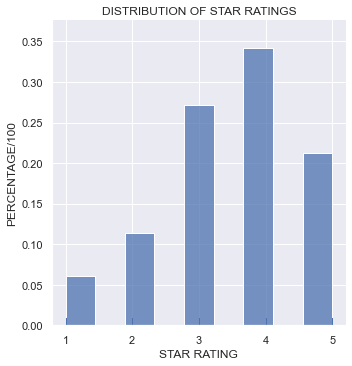

In [85]:
sns.displot(df_data_cleaned['rating'], bins = 9, stat = 'probability', rug = True)
plt.xlabel("STAR RATING")
plt.ylabel("PERCENTAGE/100")
plt.title("DISTRIBUTION OF STAR RATINGS");

### Age Plot

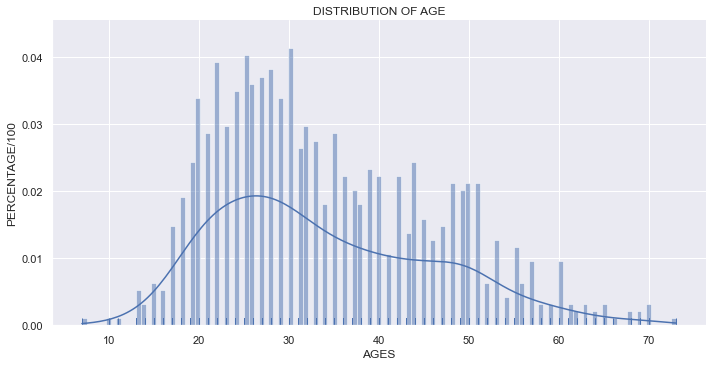

In [86]:
sns.displot(df_user['age'], bins = 121, stat = 'probability', rug = True, aspect = 2, kde = True)
plt.xlabel("AGES")
plt.ylabel("PERCENTAGE/100")
plt.title("DISTRIBUTION OF AGE");

### Release Year Plot

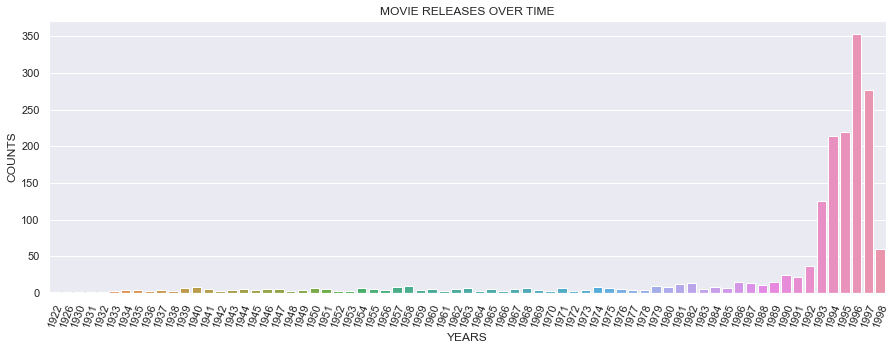

In [87]:
# ESTABLISH DATAFRAME
df_year = df_item_cleaned.copy()

# CREATE COLUMN OF DATA AND FORMAT
df_year['release year'] = pd.to_datetime(df_year['release date']).dt.year
df_year['release year'].apply(lambda x: int(x))

#CREATE PLOT
plt.figure(figsize=(15,5))
plt.xticks(rotation=70)
plt.title("MOVIE RELEASES OVER TIME")
sns.countplot(data = df_year, x = df_year['release year'])
plt.xlabel("YEARS")
plt.ylabel("COUNTS");

### Gender Plot

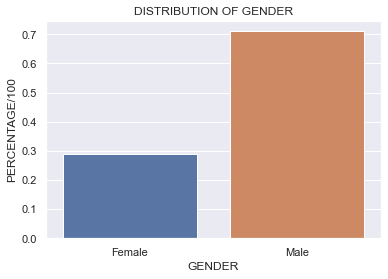

In [88]:
# ESTABLISH DATAFRAME
df_gender = df_user['gender']

# ENCODE DATA
df_gender = pd.get_dummies(df_gender, prefix = 'sex', columns = ['gender'])
df_gender.rename(columns = {'sex_F' : 'Female', 'sex_M':'Male'}, inplace = True)

# CREATE PLOT
sns.barplot(data = df_gender, ci = None)
plt.xlabel("GENDER")
plt.ylabel("PERCENTAGE/100")
plt.title("DISTRIBUTION OF GENDER");

### Occupation Plot

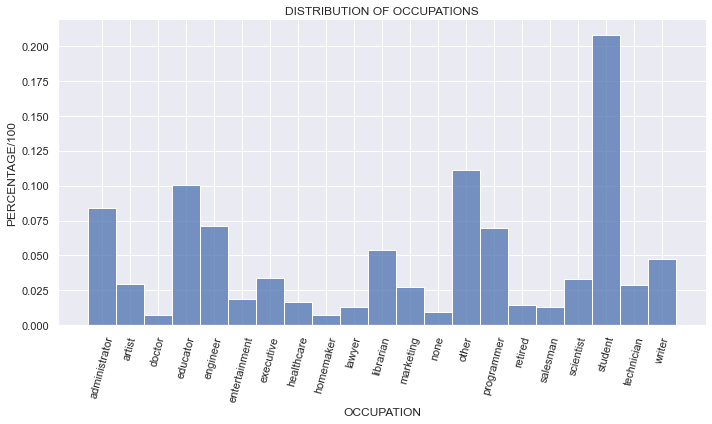

In [89]:
# ESTABLISH DATAFRAME
df_user_values = df_user.copy()

# ARRANGE DATA
df_user_values.sort_values(by = 'occupation', inplace = True)

# CREATE PLOT
sns.displot(df_user_values['occupation'], stat = 'probability', aspect = 2)
plt.xticks(rotation=75)
plt.xlabel("OCCUPATION")
plt.ylabel("PERCENTAGE/100")
plt.title("DISTRIBUTION OF OCCUPATIONS");

### Genre Popularity Changes Over Time

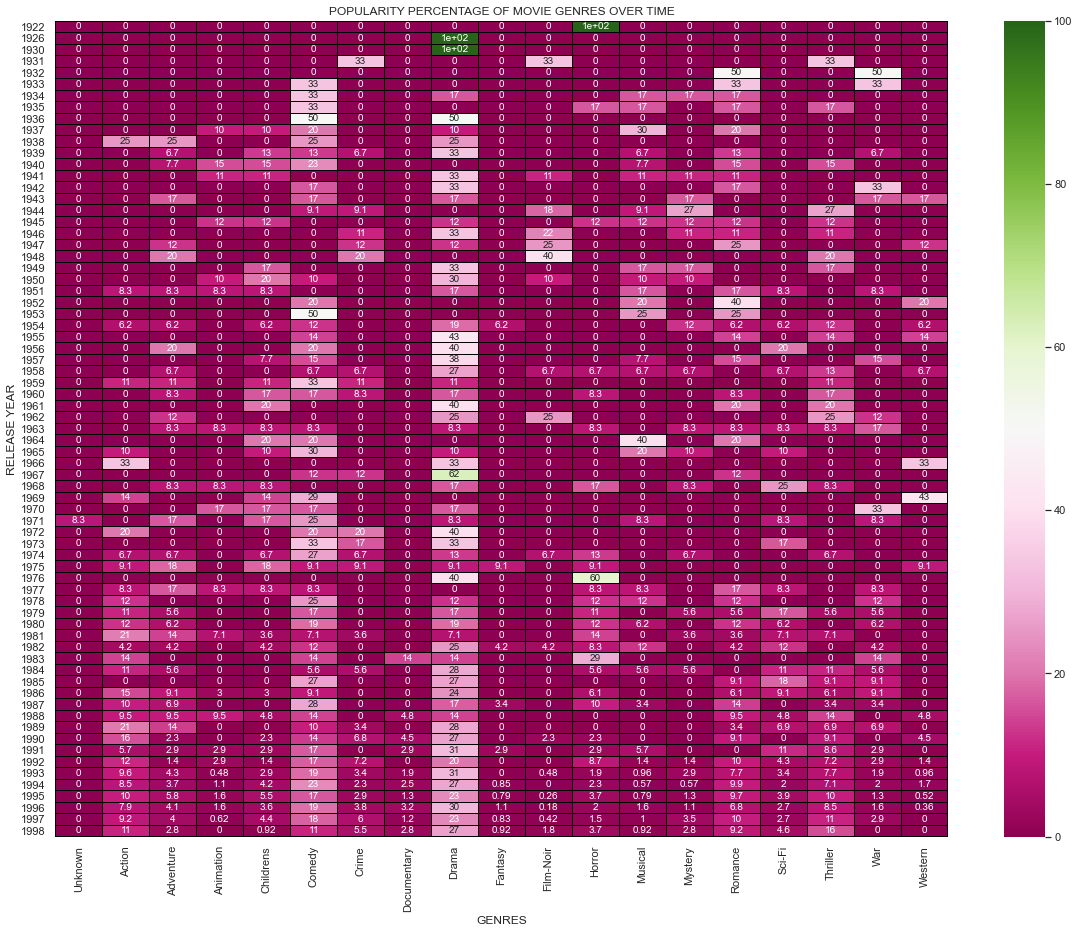

In [90]:
# ESTABLISH A DATAFRAME
# I DECIDED TO KEEP THE GENRE 'UNKNOWN' IN THIS PLOT BECAUSE OF HISTORICAL PERTINENCE
cols_to_keep_2 = ['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
                'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'release date']
df_genres_popular = df_item_cleaned[cols_to_keep_2]

# FORMAT DATE AS YEAR
df_genres_popular['release date'] = df_genres_popular['release date'].apply(lambda x : x.split('-')[2])

# ARRANGE DATA
df_grouped = df_genres_popular.groupby('release date').sum()

# CREATE COLUMNS OF DATA AND PERFORM CALCULATIONS
df_grouped['total'] = df_grouped.sum(axis =1)
df_grouped['Pop%_unknown'] = df_grouped['unknown'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Action'] = df_grouped['Action'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Adventure'] = df_grouped['Adventure'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Animation'] = df_grouped['Animation'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Childrens'] = df_grouped['Childrens'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Comedy'] = df_grouped['Comedy'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Crime'] = df_grouped['Crime'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Documentary'] = df_grouped['Documentary'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Drama'] = df_grouped['Drama'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Fantasy'] = df_grouped['Fantasy'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Film-Noir'] = df_grouped['Film-Noir'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Horror'] = df_grouped['Horror'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Musical'] = df_grouped['Musical'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Mystery'] = df_grouped['Mystery'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Romance'] = df_grouped['Romance'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Sci-Fi'] = df_grouped['Sci-Fi'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Thriller'] = df_grouped['Thriller'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_War'] = df_grouped['War'].div(df_grouped['total'], axis = 0) * 100
df_grouped['Pop%_Western'] = df_grouped['Western'].div(df_grouped['total'], axis = 0) * 100

# REESTABLISH DATAFRAME
cols_to_keep_3 = ['Pop%_unknown', 'Pop%_Action',
       'Pop%_Adventure', 'Pop%_Animation', 'Pop%_Childrens', 'Pop%_Comedy',
       'Pop%_Crime', 'Pop%_Documentary', 'Pop%_Drama', 'Pop%_Fantasy',
       'Pop%_Film-Noir', 'Pop%_Horror', 'Pop%_Musical', 'Pop%_Mystery',
       'Pop%_Romance', 'Pop%_Sci-Fi', 'Pop%_Thriller', 'Pop%_War',
       'Pop%_Western']
df_pop_genres = df_grouped[cols_to_keep_3]
df_pop_genres.rename(columns = {'Pop%_unknown': 'Unknown', 'Pop%_Action': 'Action',
                                'Pop%_Adventure': 'Adventure', 'Pop%_Animation': 'Animation',
                                'Pop%_Childrens': 'Childrens', 'Pop%_Comedy': 'Comedy',
                                'Pop%_Crime': 'Crime', 'Pop%_Documentary': 'Documentary',
                                'Pop%_Drama': 'Drama', 'Pop%_Fantasy': 'Fantasy',
                                'Pop%_Film-Noir': 'Film-Noir', 'Pop%_Horror': 'Horror',
                                'Pop%_Musical': 'Musical', 'Pop%_Mystery': 'Mystery',
                                'Pop%_Romance': 'Romance', 'Pop%_Sci-Fi': 'Sci-Fi',
                                'Pop%_Thriller': 'Thriller', 'Pop%_War': 'War',
                                'Pop%_Western':'Western'}, inplace = True)

# CREATE HEATMAP
fig, ax = plt.subplots(figsize=(20,15))   
plt.title('POPULARITY PERCENTAGE OF MOVIE GENRES OVER TIME')
sns.heatmap(data = df_pop_genres, yticklabels = True, cmap="PiYG", linewidths = .009, linecolor = 'black', annot = True)
plt.xlabel("GENRES")
plt.ylabel("RELEASE YEAR");

## Top Rated Movies With More Than 100 Ratings

In [96]:
df_100_count

,movie title,times rated
0,101 Dalmatians,109
1,12 Angry Men,125
2,2001: A Space Odyssey,259
3,Absolute Power,127
4,"Abyss, The",151
...,...,...
329,Willy Wonka and the Chocolate Factory,326
330,"Wizard of Oz, The",246
331,"Wrong Trousers, The",118
332,Young Frankenstein,200


In [92]:
# ESTABLISH DATAFRAME
df_ratings = df_data_cleaned.merge(df_item_cleaned, how = 'inner', on = 'movie id')

# ARRANGE DATA INTO NEW DATAFRAME
df_ratings_count = df_ratings.groupby('movie title')['rating'].count()

# REESTABLISH DATAFRAME
df_100_count = df_ratings_count[df_ratings_count > 100]
df_100_count = df_100_count.reset_index()
df_100_count = df_100_count.rename(columns = {'rating':'times rated'})

# COMBINE DATAFRAMES AND ARRANGE
df_hot_100 = df_ratings.merge(df_100_count, how = 'inner', on = 'movie title')
df_top_25 = df_hot_100.groupby('movie title')['rating'].mean().to_frame().sort_values(by = 'rating', ascending = False).reset_index()

# TOP 25 RESULTS
df_top_25.head(25)

,movie title,rating
0,"Close Shave, A",4.491071
1,Schindler's List,4.466443
2,"Wrong Trousers, The",4.466102
3,Casablanca,4.456790
4,"Shawshank Redemption, The",4.445230
5,Rear Window,4.387560
6,"Usual Suspects, The",4.385768
7,Star Wars,4.358491
8,12 Angry Men,4.344000
9,Citizen Kane,4.292929


## Gender Distribution Assumptions


In [98]:
# ESTABLISH DATASETS
df_sum = df_data_cleaned.merge(df_user, how = 'inner', on = 'user id')
df_sum = df_sum.merge(df_item_cleaned, how = 'inner', on = 'movie id')
df_sum = pd.get_dummies(df_sum, prefix = 'sex', columns = ['gender'])
df_drama = df_sum[df_sum['Drama'] == 1]
df_scifi = df_sum[df_sum['Sci-Fi'] == 1]
df_romance = df_sum[df_sum['Romance'] == 1]

# ESTABLISH POPULATION GENDER COUNTS
total_males = df_sum['sex_M'].sum()
total_females = df_sum['sex_F'].sum()

In [105]:
df_drama.head()

,user id,movie id,rating,timestamp,age,occupation,zip code,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sex_F,sex_M
455,196,655,5,881251793,49,writer,55105,Stand by Me,01-Jan-1986,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
456,244,655,5,880605766,28,technician,80525,Stand by Me,01-Jan-1986,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
457,253,655,4,891628142,26,librarian,22903,Stand by Me,01-Jan-1986,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
458,305,655,4,886323937,23,programmer,94086,Stand by Me,01-Jan-1986,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
459,62,655,3,879375453,27,administrator,97214,Stand by Me,01-Jan-1986,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### 1) Do Men Watch More Drama Than Women?

In [99]:
# ESTABLISH SPECIFIC GENDER COUNTS
drama_males = df_drama['sex_M'].sum()
drama_females = df_drama['sex_F'].sum()

# CHECK THE NUMBERS
if drama_males/total_males > drama_females/total_females:
    print('Yes. Men do watch more Drama than women.')
elif drama_males/total_males < drama_females/total_females:
    print('No. Women watch more Drama than men.')
elif drama_males/total_males == drama_females/total_females:
    print('Men watch neither more or less Drama than women do.')

No. Women watch more Drama than men.


### 2) Do Women Watch More Sci-Fi Than Men?

In [100]:
# ESTABLISH SPECIFIC GENDER COUNTS
scifi_males = df_scifi['sex_M'].sum()
scifi_females = df_scifi['sex_F'].sum()

# CHECK THE NUMBERS
if scifi_males/total_males > scifi_females/total_females:
    print('No. Men watch more Sci-Fi than women.')
elif scifi_males/total_males < scifi_females/total_females:
    print('Yes. Women do watch more Sci-Fi than men.')
elif scifi_males/total_males == scifi_females/total_females:
    print('Women watch neither more nor less Sci-Fi than men do.')

No. Men watch more Sci-Fi than women.


### 3) Do Men Watch More Romance Than Women?

In [101]:
# ESTABLISH SPECIFIC GENDER COUNTS
romance_males = df_romance['sex_M'].sum()
romance_females = df_romance['sex_F'].sum()

# CHECK THE NUMBERS
if romance_males/total_males > romance_females/total_females:
    print('Yes. Men do watch more Romance than women.')
elif romance_males/total_males < romance_females/total_females:
    print('No. Women watch more Romance than men.')
elif romance_males/total_males == romance_females/total_females:
    print('Men watch neither more nor less Romance than women do.')

No. Women watch more Romance than men.


In [102]:
scifi_males

10101

In [103]:
scifi_females


2629